In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\sarav\Downloads\sakthi_intellipat\Capstone\OnlineRetail.csv",encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Find the null values and check for missing data:

In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.shape

(406829, 8)

In [9]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Feature Engineering:

In [10]:
df['Revenue']=df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [11]:
revenue_generated=df.groupby('CustomerID')['Revenue'].sum()

In [12]:
m=revenue_generated.reset_index()

In [13]:
m[m['CustomerID']==17850]


,CustomerID,Revenue
4048,17850.0,5288.63


In [14]:
m.head()

,CustomerID,Revenue
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   Revenue      406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


Frequency analysis

In [16]:
freq=df.groupby('CustomerID')['InvoiceNo'].count().reset_index()

In [17]:
freq.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [18]:
df['InvoiceDate']

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 406829, dtype: object

In [19]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [21]:
df['Duration']=df['InvoiceDate'].max()-df['InvoiceDate']

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Duration
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


Recency analysis

In [23]:
recent=df.groupby('CustomerID')['Duration'].min().reset_index()
recent.head()

,CustomerID,Duration
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [24]:
recent['Duration']=recent['Duration'].dt.days
recent.head()

,CustomerID,Duration
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [25]:
final=pd.merge(m,freq,on='CustomerID',how='inner')

In [26]:
final=pd.merge(final,recent,on='CustomerID',how='inner')

In [27]:
final.head()

,CustomerID,Revenue,InvoiceNo,Duration
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Check for outliers

<function matplotlib.pyplot.show(close=None, block=None)>

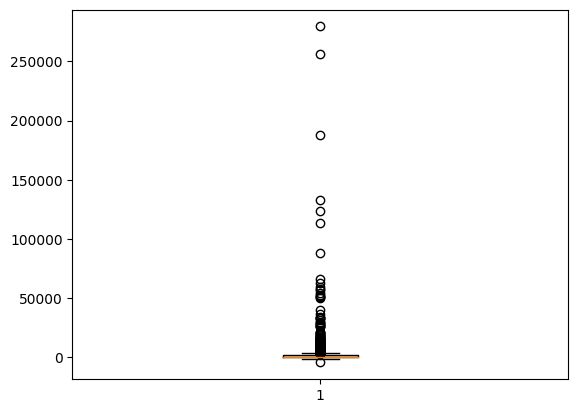

In [28]:
plt.boxplot(final['Revenue'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

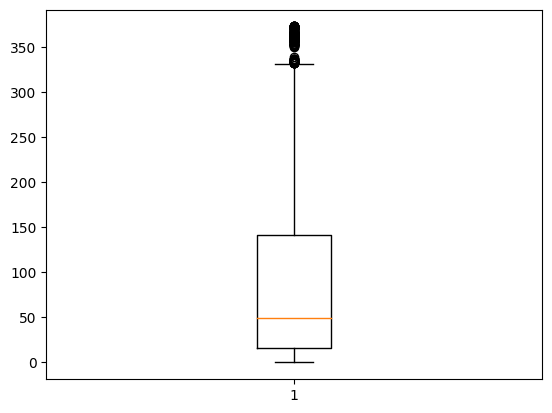

In [29]:
plt.boxplot(final['Duration'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

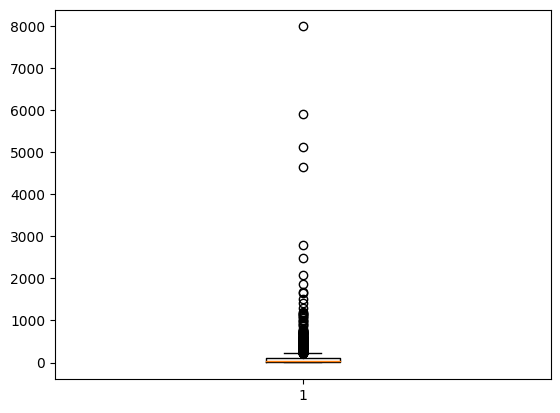

In [30]:
plt.boxplot(final['InvoiceNo'])
plt.show

In [31]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4372 non-null   float64
 1   Revenue     4372 non-null   float64
 2   InvoiceNo   4372 non-null   int64  
 3   Duration    4372 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 170.8 KB


IQR data of around 80% is used here

In [32]:
q1=final['Revenue'].quantile(0.1)
q3=final['Revenue'].quantile(0.9)
IQR=q3-q1
final=final[(final['Revenue'] >= q1-1.5*IQR) & (final['Revenue'] <= q3+1.5*IQR)]


In [33]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4253 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4253 non-null   float64
 1   Revenue     4253 non-null   float64
 2   InvoiceNo   4253 non-null   int64  
 3   Duration    4253 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 166.1 KB


In [34]:
q1=final['InvoiceNo'].quantile(0.1)
q3=final['InvoiceNo'].quantile(0.9)
IQR=q3-q1
final=final[(final['InvoiceNo'] >= q1-1.5*IQR) & (final['InvoiceNo'] <= q3+1.5*IQR)]

In [35]:
q1=final['Duration'].quantile(0.1)
q3=final['Duration'].quantile(0.9)
IQR=q3-q1
final=final[(final['Duration'] >= q1-1.5*IQR) & (final['Duration'] <= q3+1.5*IQR)]

In [36]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
column=['Duration','Revenue','InvoiceNo']
final_df=scale.fit_transform(final[column])

In [37]:
final_df

array([[ 2.27335634, -0.83255414, -0.84441616],
       [-0.9216396 ,  2.39747641,  1.43605187],
       [-0.2017794 ,  0.51434611, -0.47700742],
       ...,
       [ 0.84349705, -0.77198545, -0.78106983],
       [-0.86247301, -0.70020533, -0.70505423],
       [-0.51733456,  0.54435317,  0.01709398]])

In [38]:
rfm=pd.DataFrame(final_df)
rfm.columns=['Recency','Revenue','Frequency']
rfm.head()

,Recency,Revenue,Frequency
0,2.273356,-0.832554,-0.844416
1,-0.921640,2.397476,1.436052
2,-0.201779,0.514346,-0.477007
3,-0.754001,0.484601,0.055102
4,2.115579,-0.581946,-0.654377


In [39]:
rfm.shape

(4189, 3)

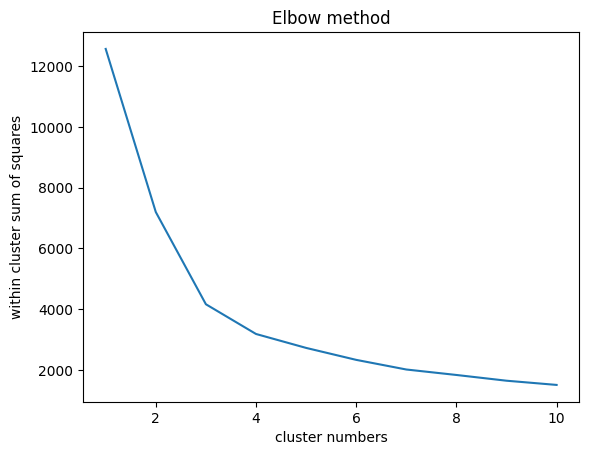

In [40]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(rfm)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('cluster numbers')
plt.ylabel('within cluster sum of squares')
plt.show()

Optimal number of cluster = 4

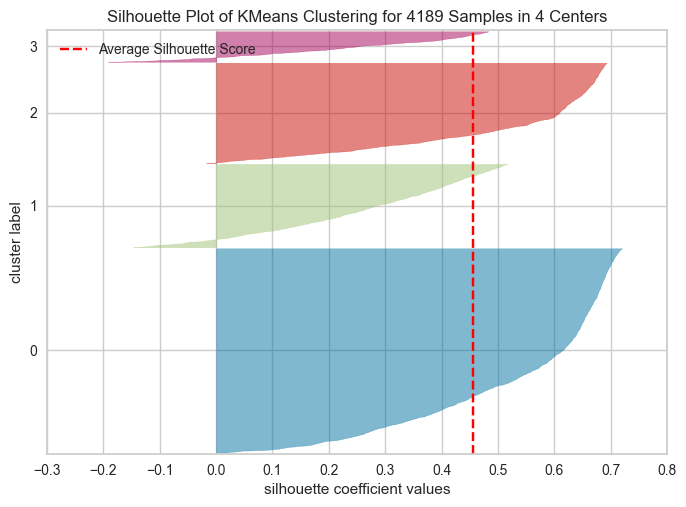

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 4189 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [41]:
from yellowbrick.cluster import SilhouetteVisualizer

model=KMeans(n_clusters=4,random_state=42)
visual=SilhouetteVisualizer(model,colors='yellowbrick')

visual.fit(rfm)
visual.show()

In [42]:
kme=KMeans(n_clusters=4,random_state=42)
y_pred=kme.fit_predict(rfm)

In [43]:
rfm['label']=y_pred

In [44]:
rfm.head()

,Recency,Revenue,Frequency,label
0,2.273356,-0.832554,-0.844416,2
1,-0.921640,2.397476,1.436052,3
2,-0.201779,0.514346,-0.477007,0
3,-0.754001,0.484601,0.055102,1
4,2.115579,-0.581946,-0.654377,2


In [45]:
rfm.label.value_counts()

0    2047
2    1003
1     834
3     305
Name: label, dtype: int64

In [46]:
from sklearn.metrics import silhouette_score
silhouette_score(rfm,y_pred)

0.5784027410637115

Visualizing all the clusters

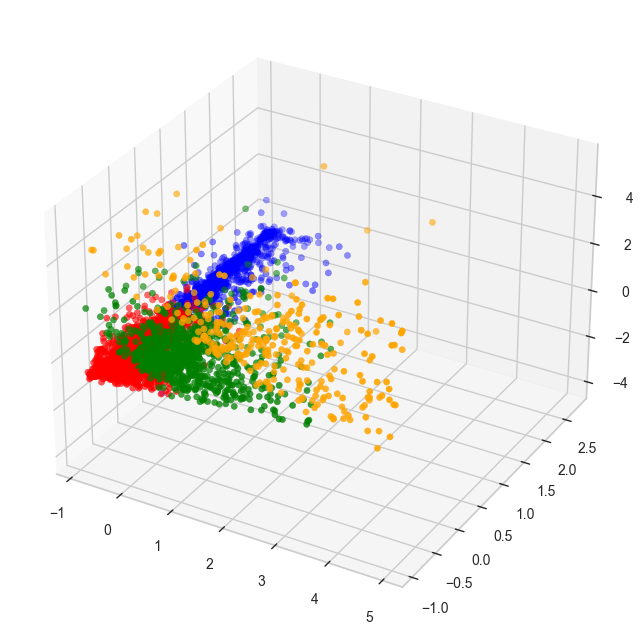

In [47]:
fig=plt.figure(figsize=(8,8))
ax=plt.axes(projection='3d')
color = {0:'red', 1:'green', 2:'blue', 3:'orange'}
ax.scatter(rfm['Frequency'],rfm['Recency'],rfm['Revenue'],c=rfm['label'].map(color))
plt.show()

In [48]:
final_kmeans=final
final_kmeans['label']=y_pred
final_kmeans.head()

,CustomerID,Revenue,InvoiceNo,Duration,label
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,3
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2


<AxesSubplot: xlabel='label', ylabel='Revenue'>

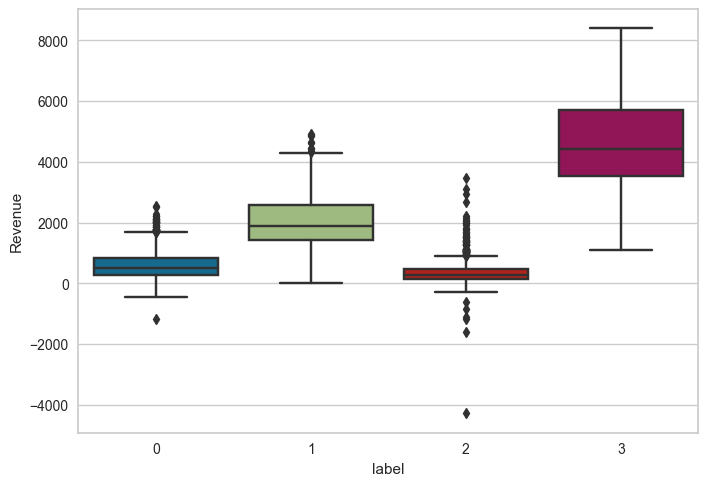

In [51]:
sns.boxplot(x='label',y='Revenue',data=final_kmeans)

<AxesSubplot: xlabel='label', ylabel='InvoiceNo'>

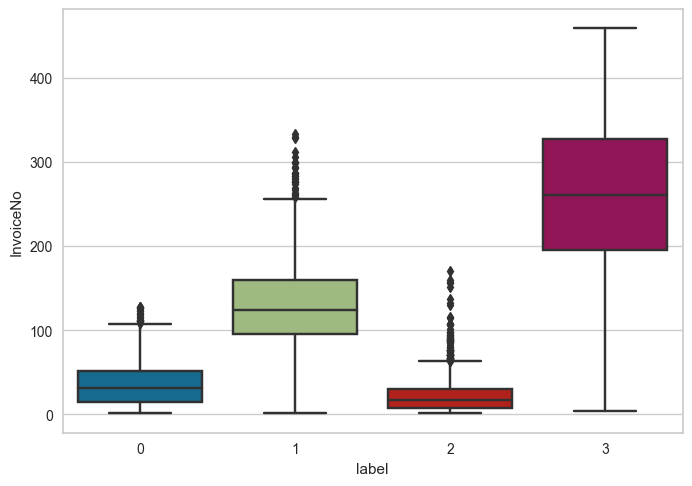

In [52]:
sns.boxplot(x='label',y='InvoiceNo',data=final_kmeans)

<AxesSubplot: xlabel='label', ylabel='Duration'>

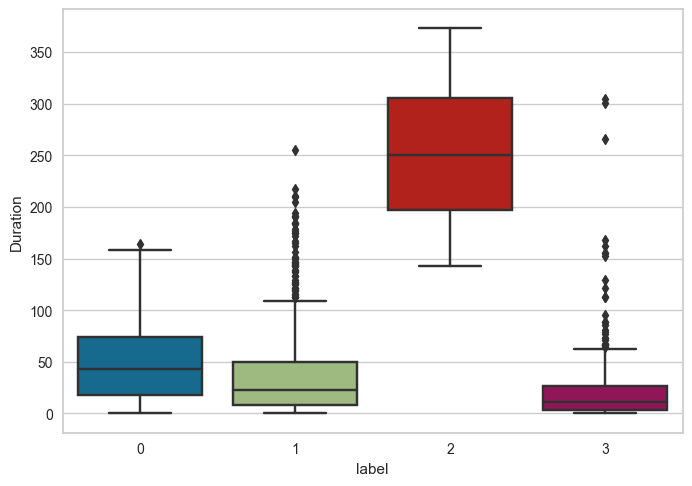

In [53]:
sns.boxplot(x='label',y='Duration',data=final_kmeans)

Hierarchial Clustering

In [54]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.cluster import AgglomerativeClustering

In [57]:
rfm.columns

Index(['Recency', 'Revenue', 'Frequency', 'label'], dtype='object')

In [58]:
df2 = rfm[['Recency', 'Revenue','Frequency']].copy()

In [59]:
df2.head()

,Recency,Revenue,Frequency
0,2.273356,-0.832554,-0.844416
1,-0.921640,2.397476,1.436052
2,-0.201779,0.514346,-0.477007
3,-0.754001,0.484601,0.055102
4,2.115579,-0.581946,-0.654377


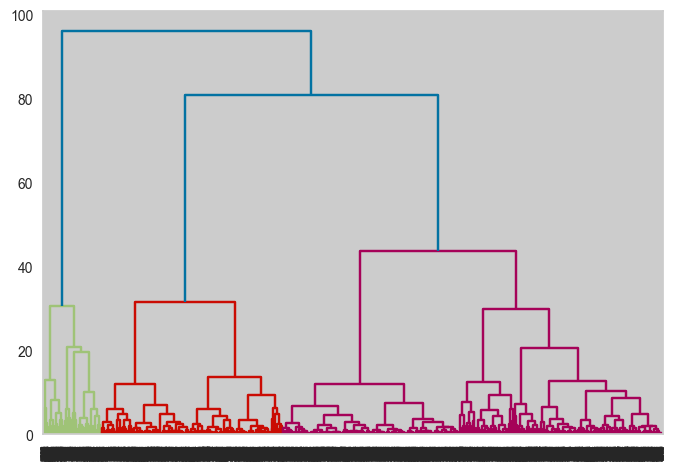

In [60]:
dendro=dendrogram(linkage(df2,method='ward'))


In [62]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='ward')

In [63]:
y_hc=hc.fit_predict(df2)

In [64]:
df2['label']=y_hc

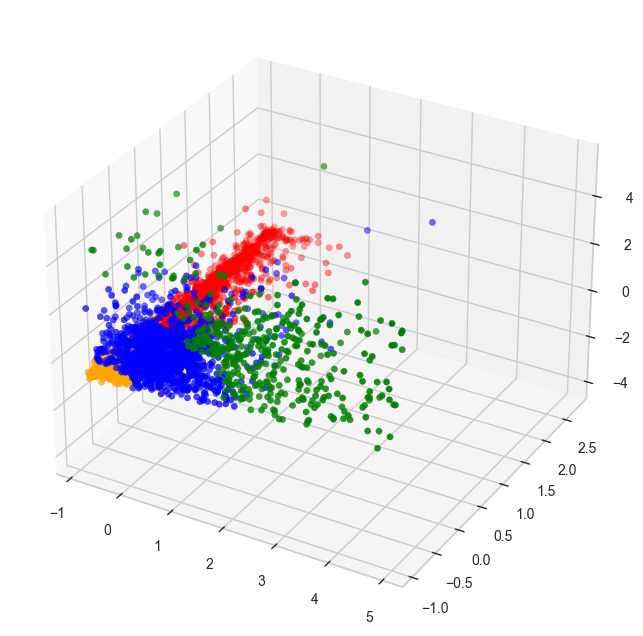

In [65]:
fig=plt.figure(figsize=(8,8))
ax=plt.axes(projection='3d')
color = {0:'red', 1:'green', 2:'blue', 3:'orange'}
ax.scatter(df2['Frequency'],df2['Recency'],df2['Revenue'],c=df2['label'].map(color))
plt.show()

In [69]:
final_hc=final
final_hc['label']=y_hc
final_hc.head()

,CustomerID,Revenue,InvoiceNo,Duration,label
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,0


<AxesSubplot: xlabel='label', ylabel='Revenue'>

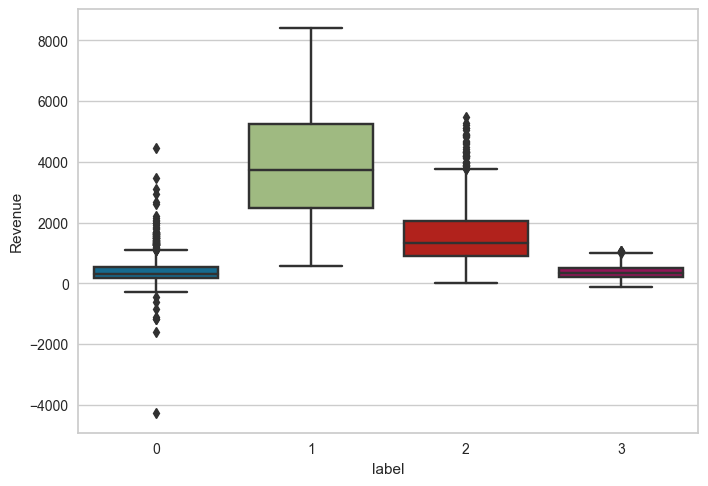

In [70]:
sns.boxplot(x='label',y='Revenue',data=final_hc)

<AxesSubplot: xlabel='label', ylabel='InvoiceNo'>

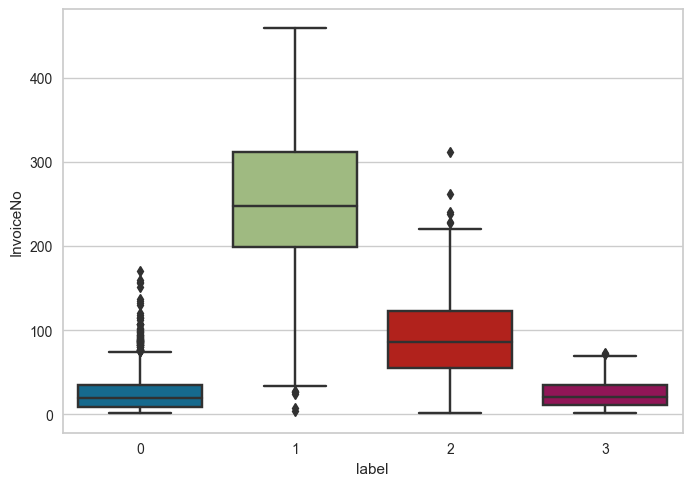

In [72]:
sns.boxplot(x='label',y='InvoiceNo',data=final_hc)

<AxesSubplot: xlabel='label', ylabel='Duration'>

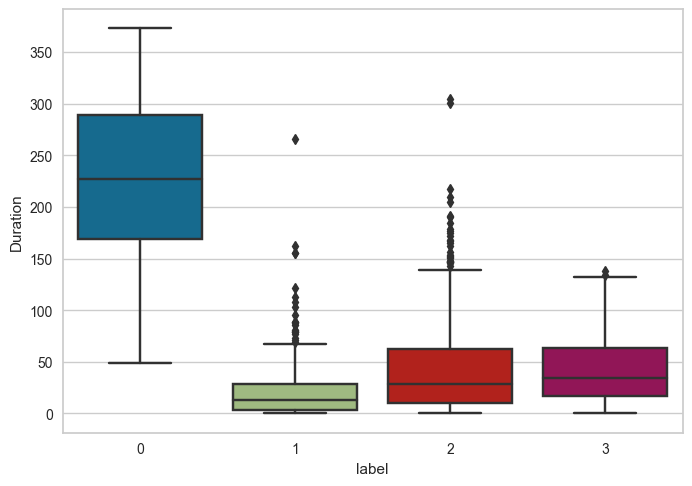

In [73]:
sns.boxplot(x='label',y='Duration',data=final_hc)